## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [4]:
#load and display dataset 
df = pd.read_csv('heart_2020_cleaned.csv')
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [5]:
#shape of data
df.shape

(319795, 18)

In [6]:
rows, columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 319795
Number of columns: 18


- The dataset consists of **319795 rows and 18 columns**

In [7]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

- the dataset consists of 17 columns of which 4 are of float data type and 14 are object type

### 4. Check the statistical summary of the dataset and write your inferences.

In [8]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


**Inferences:**
- the count values which is total number of rows is 319795 in all columns suggesting that there are **no null values**.

- the mean values, which is the average value for BMI, Physical health, Mental health and SleepTime were 28.325399, 3.37171, 3.898366, 7.097075 respectively.

- the standard deviation values of BMI, Physical health, Mental health and SleepTime suggestthat **highest varience** in data was observed incase of physical health(7.95085) and mental health(7.955235). **least varience** in data was observed in sleeptime(1.436007). 

- the minimum and maximum values for BMI were 12.020000	and 94.850000 respectively

- the minimum and maximum values for PhysicalHealth were 0.00000	and 30.00000 respectively

- the minimum and maximum values for MentalHealth were 0.00000	and 30.00000 respectively

- the minimum and maximum values for SleepTime were 1.00000	and 24.000000 respectively

- all four colums were observed to be **positively skewed** since the mean values were greater than the median(50%)


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [9]:
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

no missing values were observed in the data set

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [10]:
#finding duplicate records
len(df[df.duplicated()])

18078

In [11]:
# drop duplicate records
df.drop_duplicates(inplace=True)

In [12]:
#recheck duplicate records
len(df[df.duplicated()])

0

In [13]:
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [14]:
df['HeartDisease'].value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

In [15]:
df['HeartDisease'].value_counts(normalize=True)*100

HeartDisease
No     90.964712
Yes     9.035288
Name: proportion, dtype: float64

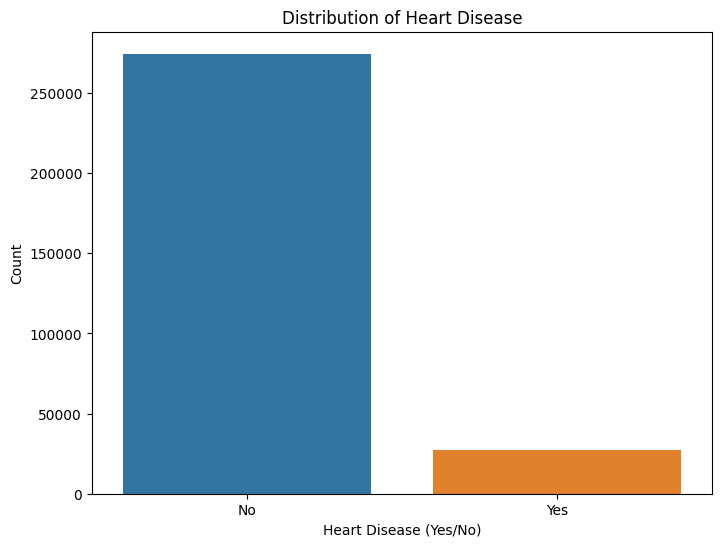

In [16]:
# Plot the distribution of 'HeartDisease'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (Yes/No)')
plt.ylabel('Count')
plt.show()

**inferences:**
- of 301717 entries, **274456** were observed to have no heart disease where as **27261** were suffering from heart disease.

- this suggests that around **90.96%** of people were having no prior heart disease where as **9.03%** had heart disease

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

<Axes: xlabel='Smoking'>

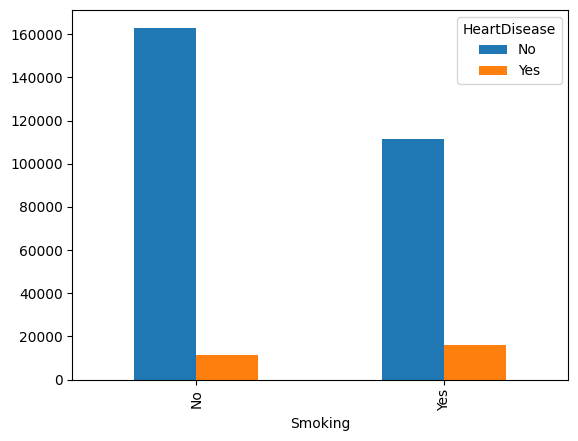

In [17]:
pd.crosstab(df['Smoking'],df['HeartDisease']).plot(kind='bar')

- we observe that total number of overall total number of people heart diseases is less when compared to people with heart disease
- incase of people with no heart disease, the number of smokers were significatly less in number
- in case of people with heart disease, the number of smokers were slightly higher suggesting that smoking may have little affect on occurence of heart disease. 

<Axes: xlabel='AlcoholDrinking'>

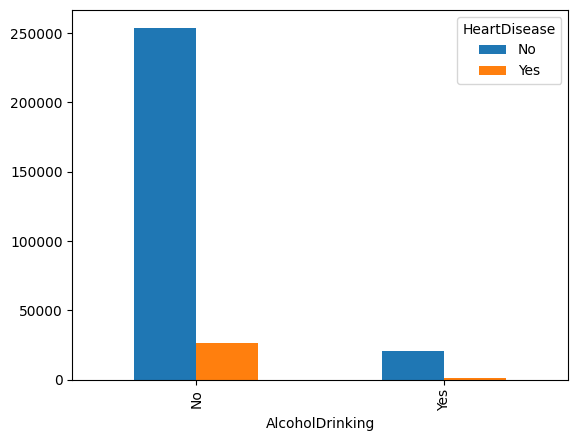

In [18]:
pd.crosstab(df['AlcoholDrinking'],df['HeartDisease']).plot(kind='bar')

- it was observed that there are significantly less number of alcohol drinkers in people with both heart disease and no heart disease suggesting that alcohol may have no affect on heart disease.

<Axes: xlabel='Stroke'>

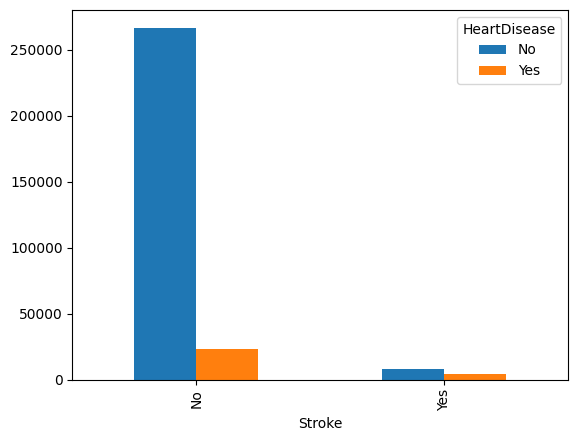

In [19]:
pd.crosstab(df['Stroke'],df['HeartDisease']).plot(kind='bar')

- it was observed that people with heart disease had comparitively higher chances of stroke since half of the people with Stroke had heart disease

<Axes: xlabel='DiffWalking'>

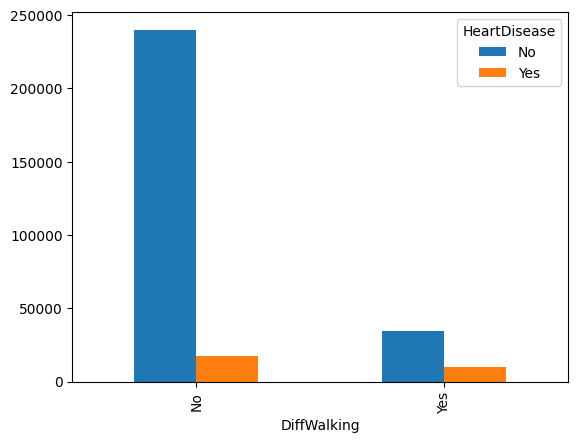

In [20]:
pd.crosstab(df['DiffWalking'],df['HeartDisease']).plot(kind='bar')

- people who had difficulty in walking had comparitively higher cases of heart disease

<Axes: xlabel='Sex'>

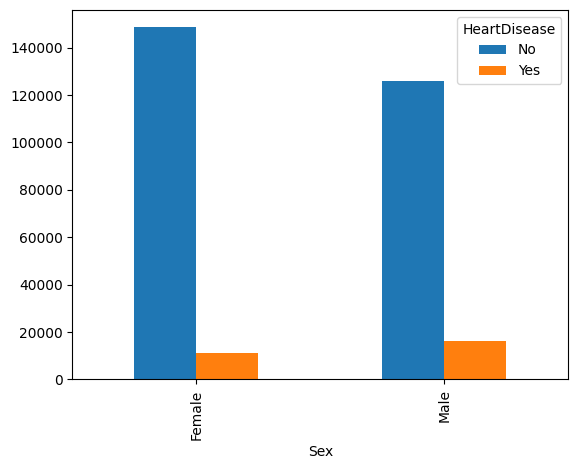

In [21]:
pd.crosstab(df['Sex'],df['HeartDisease']).plot(kind='bar')

- females were observed to have comparitively less cases of heart disease when compared to males

<Axes: xlabel='AgeCategory'>

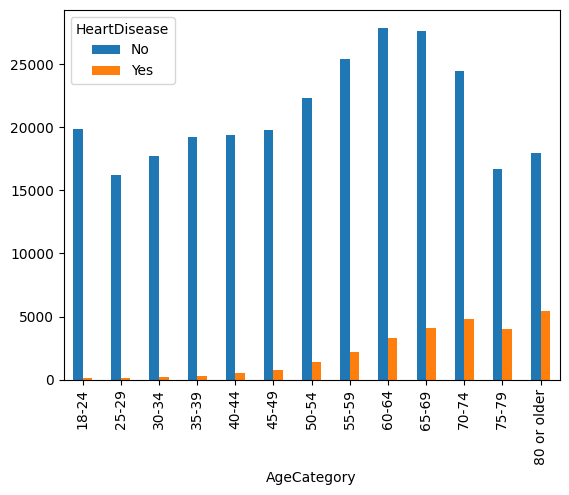

In [22]:
pd.crosstab(df['AgeCategory'],df['HeartDisease']).plot(kind='bar')

- the chances of getting a heart disease increases significanly as the age category increases with highest cases observed in 80+ age

<Axes: xlabel='Race'>

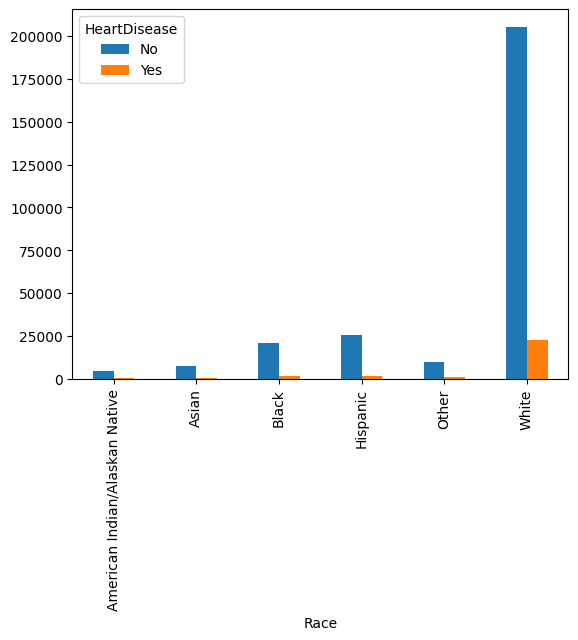

In [23]:
pd.crosstab(df['Race'],df['HeartDisease']).plot(kind='bar')

- most cases of no heart disease were observed in white race, suggesting that the data collected is more based in white race.
- most number of cases oh heart disease were also observed in white race

<Axes: xlabel='Diabetic'>

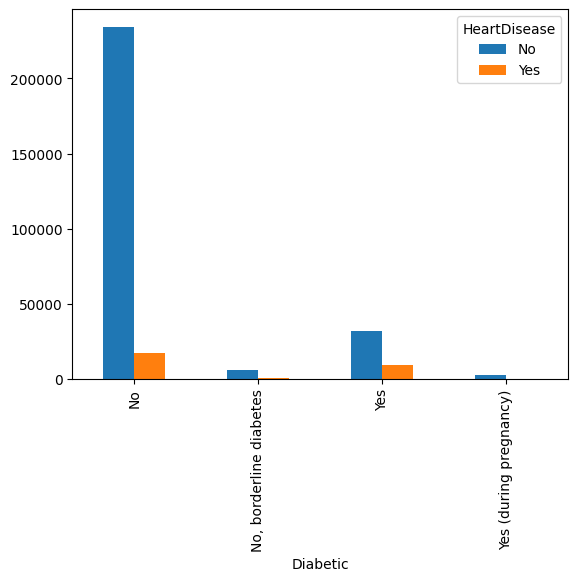

In [24]:
pd.crosstab(df['Diabetic'],df['HeartDisease']).plot(kind='bar')

- comparitively, people with diabetes had higher chances of heart diseases

<Axes: xlabel='PhysicalActivity'>

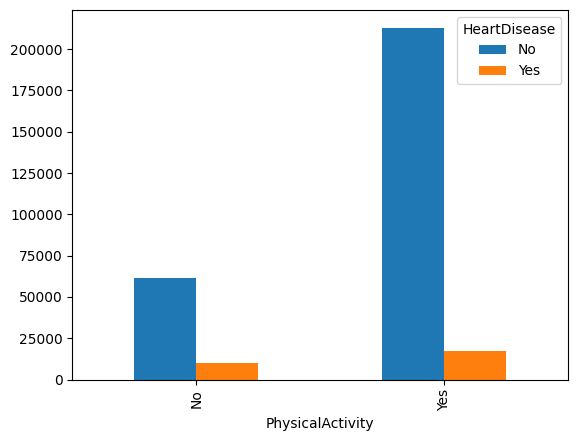

In [25]:
pd.crosstab(df['PhysicalActivity'],df['HeartDisease']).plot(kind='bar')

- people with more physical activity were observed to have less cases of heart disease and people with less physical activity were observed to have comparitively more cases of heart disease and 

<Axes: xlabel='HeartDisease'>

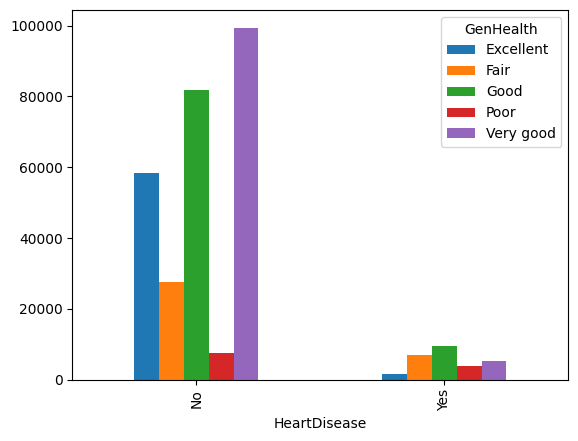

In [26]:
pd.crosstab(df['HeartDisease'],df['GenHealth']).plot(kind='bar')

- it was observed that people with poor, good, fair health had higher chances of heart disease. where as people with excellent health had less cases of heart disease

<Axes: xlabel='HeartDisease'>

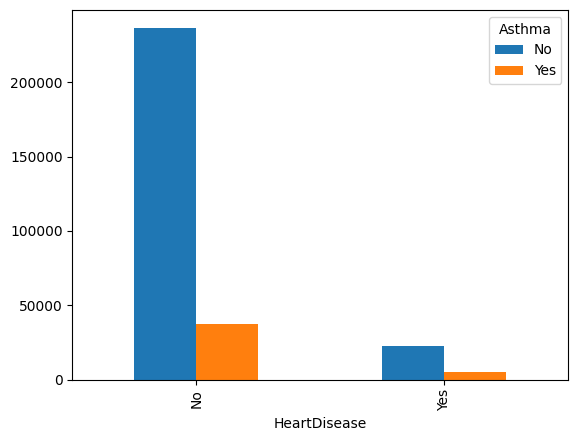

In [27]:
pd.crosstab(df['HeartDisease'],df['Asthma']).plot(kind='bar')

- more number of cases of heart disease cases were observed in people with asthma. however, people with asthma had higher chances of heart diseases. 

<Axes: xlabel='HeartDisease'>

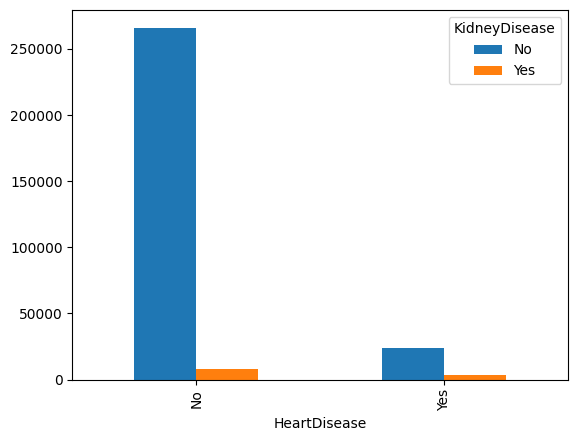

In [28]:
pd.crosstab(df['HeartDisease'],df['KidneyDisease']).plot(kind='bar')

- no relation was observed in people with kidney and heart disease.

<Axes: xlabel='HeartDisease'>

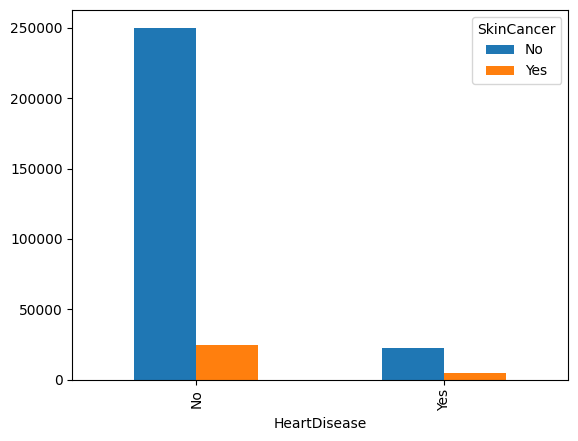

In [29]:
pd.crosstab(df['HeartDisease'],df['SkinCancer']).plot(kind='bar')

- while people with no heart disease had higher cases of skin cancer, comparitively higher percentage of heart disease was observe in people with skin cancer.


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [30]:
#check unique categories in 'Diabetic' column
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [31]:
# Replace 'Yes (during pregnancy)' with 'Yes' and 'No, borderline diabetes' with 'No'
df['Diabetic'] = df['Diabetic'].replace({
    'Yes (during pregnancy)': 'Yes',
    'No, borderline diabetes': 'No'
})

In [32]:
# Check the unique categories after replacing 
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [33]:
#check unique categories in 'Diabetic' column
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
# Replace 'No' with 0 and 'Yes' with 1 in the 'HeartDisease' column
df['HeartDisease'] = df['HeartDisease'].replace({
    'No': 0,
    'Yes': 1
})

In [35]:
# Check the column after replacement
df['HeartDisease'].unique()


array([0, 1], dtype=int64)

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [36]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding the columns "AgeCategory", "Race", and "GenHealth"
# Define columns for label encoding
label_encode_columns = ["AgeCategory", "Race", "GenHealth"]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode the specified columns
for column in label_encode_columns:
    df[column] = label_encoder.fit_transform(df[column])
    

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  int32  
 10  Race              301717 non-null  int32  
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  int32  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [38]:
# Dummy encode the rest of the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
columns_to_dummy_encode = [col for col in categorical_columns if col not in label_encode_columns]

df = pd.get_dummies(df, columns=columns_to_dummy_encode)

# Display the updated DataFrame
print(df.head())

   HeartDisease    BMI  PhysicalHealth  MentalHealth  AgeCategory  Race  \
0             0  16.60             3.0          30.0            7     5   
1             0  20.34             0.0           0.0           12     5   
2             0  26.58            20.0          30.0            9     5   
3             0  24.21             0.0           0.0           11     5   
4             0  23.71            28.0           0.0            4     5   

   GenHealth  SleepTime  Smoking_No  Smoking_Yes  ...  Diabetic_No  \
0          4        5.0       False         True  ...        False   
1          4        7.0        True        False  ...         True   
2          1        8.0       False         True  ...        False   
3          2        6.0        True        False  ...         True   
4          4        8.0        True        False  ...         True   

   Diabetic_Yes  PhysicalActivity_No  PhysicalActivity_Yes  Asthma_No  \
0          True                False                  T

In [39]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_No,Smoking_Yes,...,Diabetic_No,Diabetic_Yes,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,False,True,...,False,True,False,True,False,True,True,False,False,True
1,0,20.34,0.0,0.0,12,5,4,7.0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,0,26.58,20.0,30.0,9,5,1,8.0,False,True,...,False,True,False,True,False,True,True,False,True,False
3,0,24.21,0.0,0.0,11,5,2,6.0,True,False,...,True,False,True,False,True,False,True,False,False,True
4,0,23.71,28.0,0.0,4,5,4,8.0,True,False,...,True,False,False,True,True,False,True,False,True,False


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [40]:
# Data split: Independent vs target variable

X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

# check the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (301717, 27)
y shape: (301717,)


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [41]:
from sklearn.model_selection import train_test_split

# Split the dataset into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Print the shapes of train and test data
print(" X_train:", X_train.shape)
print(" X_test:", X_test.shape)
print(" y_train:", y_train.shape)
print(" y_test:", y_test.shape)

 X_train: (211201, 27)
 X_test: (90516, 27)
 y_train: (211201,)
 y_test: (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the scaled data
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)

X_train_scaled: (211201, 27)
X_test_scaled: (90516, 27)


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [43]:
from sklearn.metrics import accuracy_score

def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [45]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boost': GradientBoostingClassifier()
}

# Initialize Stacking Classifier 
stacked_model = StackingClassifier(estimators=[
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier())
], final_estimator=LogisticRegression())

In [46]:
# Create a dictionary to store the scores
accuracy_scores = {}

In [47]:
# Train, predict, and evaluate each model
for model_name, model in models.items():
    accuracy = train_predict_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)
    accuracy_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Train, predict, and evaluate the Stacked Classifier
stacked_accuracy = train_predict_evaluate(stacked_model, X_train_scaled, y_train, X_test_scaled, y_test)
accuracy_scores['Stacked Classifier'] = stacked_accuracy
print(f"Stacked Classifier Accuracy: {stacked_accuracy:.4f}")

Logistic Regression Accuracy: 0.9096
KNN Accuracy: 0.8999
Naive Bayes Accuracy: 0.8333
Decision Tree Accuracy: 0.8539
Random Forest Accuracy: 0.8972
AdaBoost Accuracy: 0.9098
Gradient Boost Accuracy: 0.9101
Stacked Classifier Accuracy: 0.9093


In [48]:
# Compare model accuracies
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"The best-performing model is {best_model} with an accuracy of {accuracy_scores[best_model]:.4f}")

The best-performing model is Gradient Boost with an accuracy of 0.9101


### Conclusion

**Conclusions:**
- The final best performing model when compared to other models was observed to be Gradient Boost with an accuracy of 0.9101

**Steps to improve accuracy:**
- we can use hyperparameter tuning for the best-performing model to improve accuracy.
- Experiment with different feature engineering techniques.

----
## Happy Learning:)
----